In [2]:
# read data from Kaggle
import kagglehub

# download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

/Users/gufeng/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/gufeng/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [3]:
# check the files in the given path and read them into pandas Dataframe
import os 
import pandas as pd

file_names = os.listdir(path)
file_paths = [os.path.join(path, file_name) for file_name in file_names]
test_data = pd.read_csv(file_paths[0])
train_data = pd.read_csv(file_paths[1])

In [4]:
# glance the test_data and train_data
train_data.head()
test_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
# check the data type for these dataframes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
# transfer the date column into timestamp/datetime64 data type
for data in [train_data, test_data]:
    data["date"] = pd.to_datetime(data["date"])

test_data.info() # no null values
train_data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), floa

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [8]:
# draw the train data for the four variables
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def _check_the_four(cols, dataframe = train_data):
    fig, axes = plt.subplots(
        4,1, figsize = (9, 7), sharex=True, dpi = 300
        )
    for ax, col in zip(axes, cols):
        sns.lineplot(data = train_data, x = "date", y = dataframe[col], ax = ax)
        ax.grid()
    return fig, axes

# _ = _check_the_four()

In [9]:
# detect the abnormal values in these variables
def detect_outliers_iqr(data):
    """
    Detects outliers in a pandas Series using the IQR method.
    
    Parameters:
        data (pd.Series): Input data series to check for outliers.
        
    Returns:
        pd.Series: Outliers detected in the data.
        tuple: Lower and upper bounds for the outliers.
    """
    # Calculate Q1, Q3, and IQR
    Q1 = data.quantile(0.05)
    Q3 = data.quantile(0.95)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, (lower_bound, upper_bound)

In [10]:
# check the outliers
outlier_pressure = detect_outliers_iqr(train_data.meanpressure)
outlier_humidity = detect_outliers_iqr(train_data.meantemp)
outlier_windspeed = detect_outliers_iqr(train_data.wind_speed)
outlier_meantemp = detect_outliers_iqr(train_data.meantemp)

# outlier_meantemp

for name in list(globals()):
    if name.startswith("outlier"):
        print(f"---{name}--- \n outliers: \n {globals()[name][0]} \n fence range: \n{globals()[name][1]}")
        print("--" * 20)

---outlier_pressure--- 
 outliers: 
 1182    7679.333333
1255     938.066667
1300     946.312500
1309     310.437500
1321     633.900000
1323      -3.041667
1362    1352.615385
1416    1350.296296
1427      12.045455
Name: meanpressure, dtype: float64 
 fence range: 
(963.0895833333334, 1053.0729166666665)
----------------------------------------
---outlier_humidity--- 
 outliers: 
 Series([], Name: meantemp, dtype: float64) 
 fence range: 
(-21.877232142857146, 69.81205357142858)
----------------------------------------
---outlier_windspeed--- 
 outliers: 
 251    42.22
Name: wind_speed, dtype: float64 
 fence range: 
(-19.90625, 35.643750000000004)
----------------------------------------
---outlier_meantemp--- 
 outliers: 
 Series([], Name: meantemp, dtype: float64) 
 fence range: 
(-21.877232142857146, 69.81205357142858)
----------------------------------------


In [11]:
# pressure is the special one, where there are many outliers
# first, filter these rows out, check the filtered data
filtered_df = train_data[~train_data['meanpressure'].isin(outlier_pressure)]
filtered_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [12]:
outlier_pressure[0].index.values

array([1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427])

In [13]:
# replace the extreme values with the moving average value on that place
moving_pressure = train_data.meanpressure.rolling(window = 120).mean()

# indices for outliers
outlier_pressure_index = outlier_pressure[0].index.values
train_data.meanpressure[outlier_pressure_index] \
    = moving_pressure.iloc[outlier_pressure_index]
    
# check the modified data
train_data.iloc[outlier_pressure_index] # now, it looks normal in the meanpressure variable

/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_54697/2045097267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.meanpressure[outlier_pressure_index] \


,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.800000,6.546667,1071.351240
1255,2016-06-09,35.733333,43.733333,9.260000,1062.739129
1300,2016-07-24,31.437500,72.250000,2.431250,1056.763967
1309,2016-08-02,30.687500,72.125000,6.375000,994.851304
1321,2016-08-14,28.933333,83.700000,6.370000,991.145462
1323,2016-08-16,31.333333,66.416667,14.666667,982.719545
1362,2016-09-24,31.240000,66.480000,5.496154,985.943455
1416,2016-11-17,21.730769,51.730769,11.550000,994.151977
1427,2016-11-28,22.454545,37.318182,9.185714,987.363044


(<Figure size 2700x2100 with 4 Axes>,
 array([<Axes: xlabel='date', ylabel='meantemp'>,
        <Axes: xlabel='date', ylabel='humidity'>,
        <Axes: xlabel='date', ylabel='wind_speed'>,
        <Axes: xlabel='date', ylabel='meanpressure'>], dtype=object))

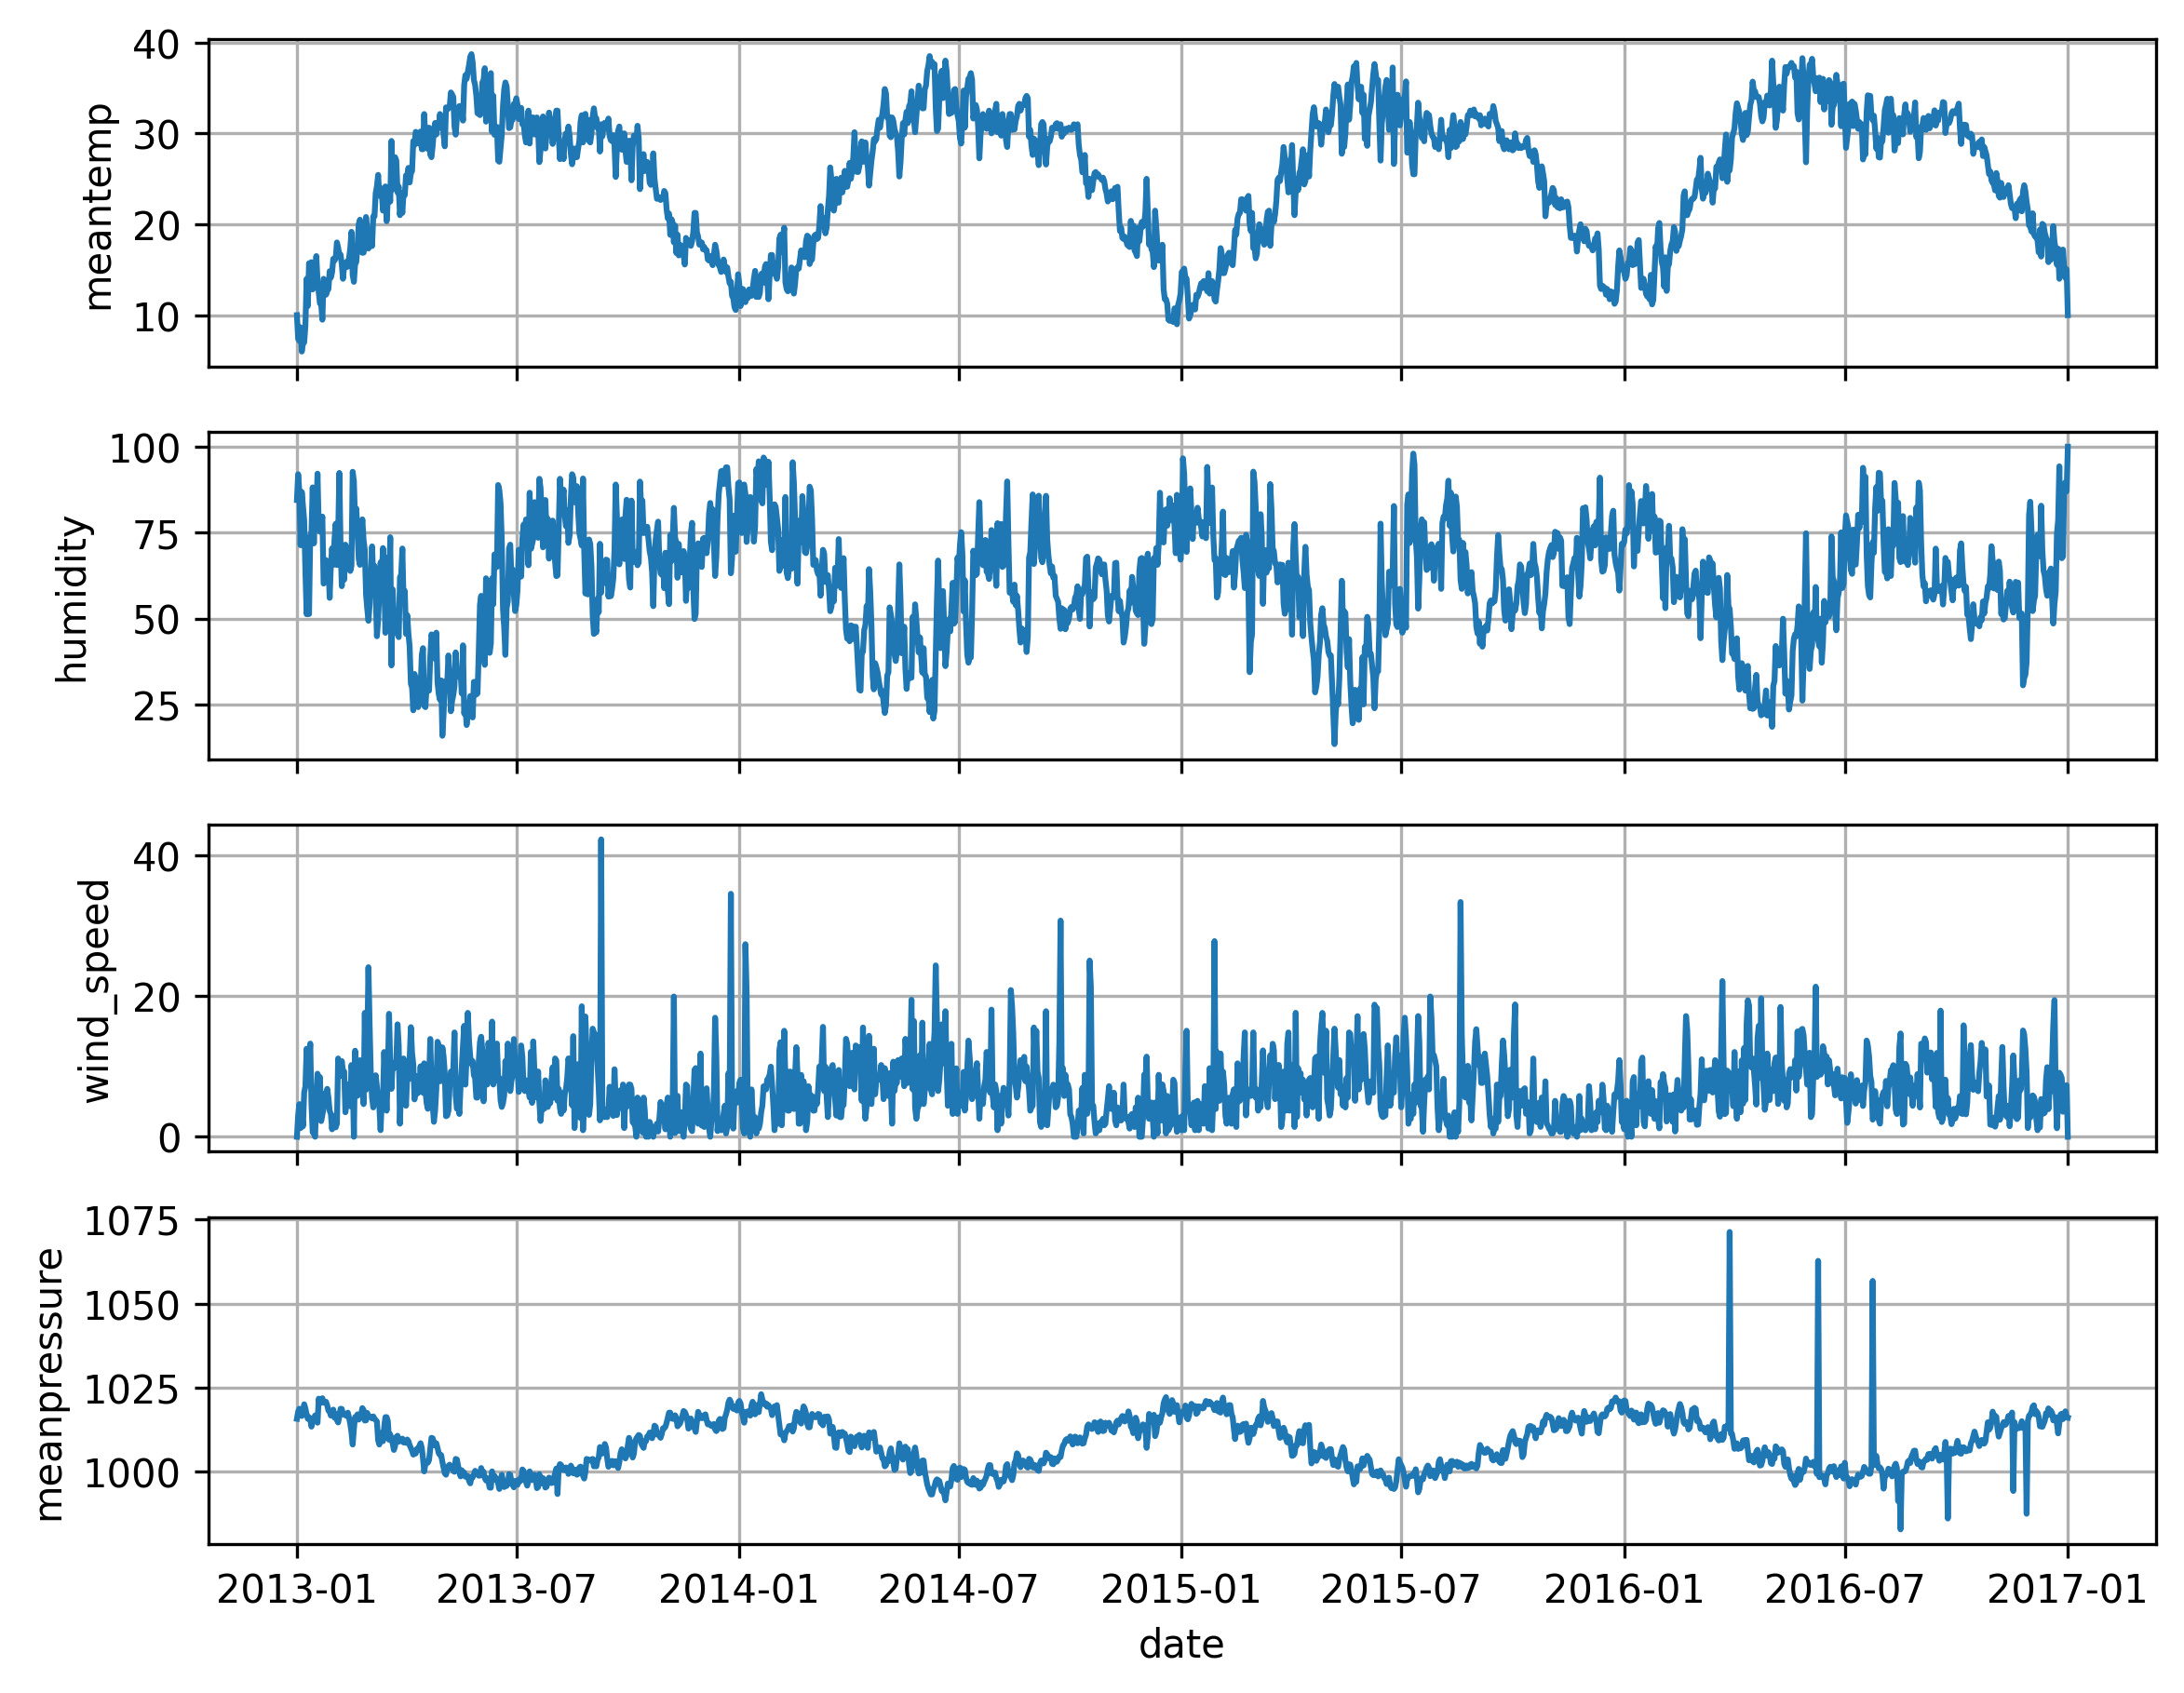

In [14]:
# quickly check the 4 variables' trend
variable_names = train_data.columns[1:5].values
_check_the_four(variable_names)

In [15]:
# extract the season part
def assign_season(date_series):
    """
    Function to assign a season to each date in a pandas datetime series.
    Seasons are based on the Indian climate.
    
    Args:
        date_series (pd.Series): A pandas series of datetime objects.

    Returns:
        pd.Series: A pandas series of season names corresponding to the input dates.
    """
    def get_season(date):
        month = date.month
        if month in [12, 1, 2]:  # Winter: December, January, February
            return "Winter"
        elif month in [3, 4, 5]:  # Spring: March, April, May, June
            return "Spring"
        elif month in [6, 7, 8]:  # Summer: July, August, September
            return "Summer"
        elif month in [9, 10, 11]:  # Autumn: October, November
            return "Autumn"
        else:
            return None  # Fallback, though not expected

    return date_series.apply(get_season)

In [16]:
season = assign_season(train_data.date)
train_data['season'] = season

In [17]:
# create a copy train_data to aviod demaging the train data accidently
copy_train_data = train_data.copy()

In [18]:
# create dummy variables based on season 4 columns - (0, 1)
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(train_data[['season']])

# Take out the dummy variale names
dummy_varialbes = encoder.get_feature_names_out()

# Assign the values into the train data
for i, col in enumerate(dummy_varialbes):
    train_data[col] = encoded_data[:, i]

train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,season,season_Autumn,season_Spring,season_Summer,season_Winter
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,Winter,0.0,0.0,0.0,1.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,Winter,0.0,0.0,0.0,1.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,Winter,0.0,0.0,0.0,1.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,Winter,0.0,0.0,0.0,1.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,Winter,0.0,0.0,0.0,1.0


In [19]:
# covert the dummy variables into int type
train_data[dummy_varialbes] = train_data[dummy_varialbes].astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1462 non-null   datetime64[ns]
 1   meantemp       1462 non-null   float64       
 2   humidity       1462 non-null   float64       
 3   wind_speed     1462 non-null   float64       
 4   meanpressure   1462 non-null   float64       
 5   season         1462 non-null   object        
 6   season_Autumn  1462 non-null   int64         
 7   season_Spring  1462 non-null   int64         
 8   season_Summer  1462 non-null   int64         
 9   season_Winter  1462 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 114.3+ KB


In [20]:
# before transforming the original data, doing tests on y to check its stationary

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

def analyze_time_series(series, seasonal_period=60, alpha=0.05, lags=10):
    """
    Perform ADF, KPSS, number of differences, number of seasonal differences, 
    and Ljung-Box tests on a time series.
    
    Args:
        series (pd.Series): The time series data.
        seasonal_period (int): Seasonal period for the unitroot_nsdiffs.
        alpha (float): Significance level for stationarity tests.
        lags (int): Number of lags for the Ljung-Box test.
    
    Returns:
        pd.DataFrame: Results of the tests in a structured DataFrame.
    """
    def unitroot_ndiffs(series, alpha=alpha):
        diff_count = 0
        while adfuller(series, autolag='AIC')[1] > alpha:
            series = series.diff().dropna()
            diff_count += 1
        return diff_count

    def unitroot_nsdiffs(series, seasonal_period=seasonal_period, alpha=alpha):
        diff_count = 0
        while adfuller(series, autolag='AIC')[1] > alpha:
            series = series.diff(periods=seasonal_period).dropna()
            diff_count += 1
        return diff_count

    # Run ADF Test
    adf_result = adfuller(series, autolag='AIC')
    adf_p_value = adf_result[1]

    # Run KPSS Test
    kpss_result = kpss(series, regression='c', nlags='auto')
    kpss_p_value = kpss_result[1]

    # Calculate number of differences
    ndiffs = unitroot_ndiffs(series)

    # Calculate number of seasonal differences
    nsdiffs = unitroot_nsdiffs(series)

    # Create a DataFrame summarizing the results
    summary = pd.DataFrame({
        "Variable": [series.name] * 4,
        "Test": ["ADF Test", "KPSS Test", "Unit Root Differences", "Seasonal Differences"],
        "P-Value": [adf_p_value, kpss_p_value, ":)", ":)"],
        "Test Statistic": [adf_result[0], kpss_result[0], ndiffs, nsdiffs]
    })

    return summary

# Example usage
# Replace `data` with your actual time series
results = analyze_time_series(train_data.meantemp, seasonal_period=4)
results

/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Variable,Test,P-Value,Test Statistic
0,meantemp,ADF Test,0.277412,-2.021069
1,meantemp,KPSS Test,0.1,0.187864
2,meantemp,Unit Root Differences,:),1.000000
3,meantemp,Seasonal Differences,:),1.000000


In [21]:
# because the mean temperature does not pass the ADF and KPSS tests
# it indicates we need do some transformation on y to make it stationary
# in order to use ARIMA model on it 

# do one-order difference on the mean temperature and test it again
train_data["diff1_meantemp"] = train_data.meantemp.diff()
train_data.head()
results = analyze_time_series(train_data["diff1_meantemp"][1:])
results

/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Variable,Test,P-Value,Test Statistic
0,diff1_meantemp,ADF Test,0.0,-16.378720
1,diff1_meantemp,KPSS Test,0.1,0.189623
2,diff1_meantemp,Unit Root Differences,:),0.000000
3,diff1_meantemp,Seasonal Differences,:),0.000000


In [22]:
# let us apply this test on the 4 variables together to decide 
# whether we need to differ them all
variable_names = train_data.columns[1:5].values
stationary_tests = [analyze_time_series(train_data[col]) for col in variable_names]
stationary_tests

/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
lo

[   Variable                   Test   P-Value  Test Statistic
 0  meantemp               ADF Test  0.277412       -2.021069
 1  meantemp              KPSS Test       0.1        0.187864
 2  meantemp  Unit Root Differences        :)        1.000000
 3  meantemp   Seasonal Differences        :)        2.000000,
    Variable                   Test  P-Value  Test Statistic
 0  humidity               ADF Test  0.00447       -3.675577
 1  humidity              KPSS Test      0.1        0.091737
 2  humidity  Unit Root Differences       :)        0.000000
 3  humidity   Seasonal Differences       :)        0.000000,
      Variable                   Test   P-Value  Test Statistic
 0  wind_speed               ADF Test  0.002541       -3.838097
 1  wind_speed              KPSS Test       0.1        0.137734
 2  wind_speed  Unit Root Differences        :)        0.000000
 3  wind_speed   Seasonal Differences        :)        0.000000,
        Variable                   Test   P-Value  Test Statis

In [23]:
# concat these tests together
stationary_tests_all = pd.concat(stationary_tests, axis=0, ignore_index=True)
stationary_tests_all

,Variable,Test,P-Value,Test Statistic
0,meantemp,ADF Test,0.277412,-2.021069
1,meantemp,KPSS Test,0.1,0.187864
2,meantemp,Unit Root Differences,:),1.000000
3,meantemp,Seasonal Differences,:),2.000000
4,humidity,ADF Test,0.00447,-3.675577
5,humidity,KPSS Test,0.1,0.091737
6,humidity,Unit Root Differences,:),0.000000
7,humidity,Seasonal Differences,:),0.000000
8,wind_speed,ADF Test,0.002541,-3.838097
9,wind_speed,KPSS Test,0.1,0.137734


In [24]:
def analyze_time_series_more(dataframe, cols):
    """Doing the stationary tests on a series of columns and return a 
    concated dataframe for easy checking

    Args:
        dataframe (pd.dataframe): the time series dataframe
        cols (sequence): the name of columns in the dataframe
    """
    # drop the rows where containing NaN values
    dataframe = dataframe.dropna()
    
    # doing the tests
    stationary_tests = [analyze_time_series(dataframe[col]) for col in cols]
    stationary_tests_all = pd.concat(stationary_tests, axis=0, ignore_index=True)

    return stationary_tests_all

In [25]:
# because the mean temperature needs to be starionary, we do one-order difference on 
# all the variables here
train_data[variable_names + "_diff1"] = train_data[variable_names].diff()
train_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,season,season_Autumn,season_Spring,season_Summer,season_Winter,diff1_meantemp,meantemp_diff1,humidity_diff1,wind_speed_diff1,meanpressure_diff1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,Winter,0,0,0,1,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,Winter,0,0,0,1,-2.600000,-2.600000,7.500000,2.980000,2.133333
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,Winter,0,0,0,1,-0.233333,-0.233333,-5.000000,1.653333,0.866667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,Winter,0,0,0,1,1.500000,1.500000,-15.666667,-3.400000,-1.500000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,Winter,0,0,0,1,-2.666667,-2.666667,15.500000,2.466667,-0.666667


In [26]:
# now, do the tests again on the differed data
stationary_tests_all = analyze_time_series_more(train_data,variable_names + "_diff1")
stationary_tests_all

/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/gufeng/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Variable,Test,P-Value,Test Statistic
0,meantemp_diff1,ADF Test,0.0,-16.378720
1,meantemp_diff1,KPSS Test,0.1,0.189623
2,meantemp_diff1,Unit Root Differences,:),0.000000
3,meantemp_diff1,Seasonal Differences,:),0.000000
4,humidity_diff1,ADF Test,0.0,-12.683532
5,humidity_diff1,KPSS Test,0.1,0.112852
6,humidity_diff1,Unit Root Differences,:),0.000000
7,humidity_diff1,Seasonal Differences,:),0.000000
8,wind_speed_diff1,ADF Test,0.0,-12.837720
9,wind_speed_diff1,KPSS Test,0.095817,0.356704


In [58]:
# train_data.head()
test = np.vstack((variable_names, variable_names + "_diff1"))
test.reshape((-1))

array(['meantemp', 'humidity', 'wind_speed', 'meanpressure',
       'meantemp_diff1', 'humidity_diff1', 'wind_speed_diff1',
       'meanpressure_diff1'], dtype=object)

In [93]:
# quickly check the 4 variables before and after the transformation
import matplotlib.ticker as ticker

def _check_the_eight(dataframe = train_data,
                     cols = np.hstack((variable_names, variable_names + "_diff1")),
                     plot_type = "line"
                     ):
    fig, axes = plt.subplots(
        4,2, figsize = (14, 9), sharex=True, dpi = 300
        )
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))  # Show only 6 ticks

    if plot_type == "line":
        for ax, col in zip(axes.flatten(), cols):
            sns.lineplot(data = train_data, x = "date", y = dataframe[col], ax = ax)
            ax.grid()
    elif plot_type == "ACF":
        for ax, col in zip(axes.flatten(), cols):
            custom_plot_acf(dataframe[col], ax = ax)
            ax.grid()
    elif plot_type == "PACF":
        for ax, col in zip(axes.flatten(), cols):
            custom_plot_pacf(dataframe[col], ax = ax)
            ax.grid()

    return fig, ax

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def custom_plot_acf(series, lags=10, ax=None):
    """
    Plot the ACF for a given time series using object-oriented matplotlib.

    Args:
        series (pd.Series or np.array): The time series data.
        lags (int): Number of lags to include in the plots.
        ax (matplotlib.axes.Axes, optional): Axis object to plot on. Defaults to None.

    Returns:
        ax: The matplotlib axes object.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(9, 7))  # Create new figure and axis if not provided

    # Plot ACF
    plot_acf(series, lags=lags, ax=ax)
    ax.set_ylim(-1.1, 1.1)  # Set y-axis limits
    ax.set_title(f"ACF of {series.name}")
    

    plt.tight_layout()
    return ax

def custom_plot_pacf(series, lags=10, ax=None):
    """
    Plot the PACF for a given time series using object-oriented matplotlib.

    Args:
        series (pd.Series or np.array): The time series data.
        lags (int): Number of lags to include in the plots.
        ax (matplotlib.axes.Axes, optional): Axis object to plot on. Defaults to None.

    Returns:
        ax: The matplotlib axes object.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(9, 7))  # Create new figure and axis if not provided

    # Plot PACF
    plot_pacf(series, lags=lags, ax=ax, method="ywm")
    ax.set_ylim(-1.1, 1.1)  # Set y-axis limits
    ax.set_title(f"PACF of {series.name}")
    
    plt.tight_layout()
    return ax

(<Figure size 4200x2700 with 8 Axes>,
 <Axes: title={'center': 'ACF of meanpressure_diff1'}>)

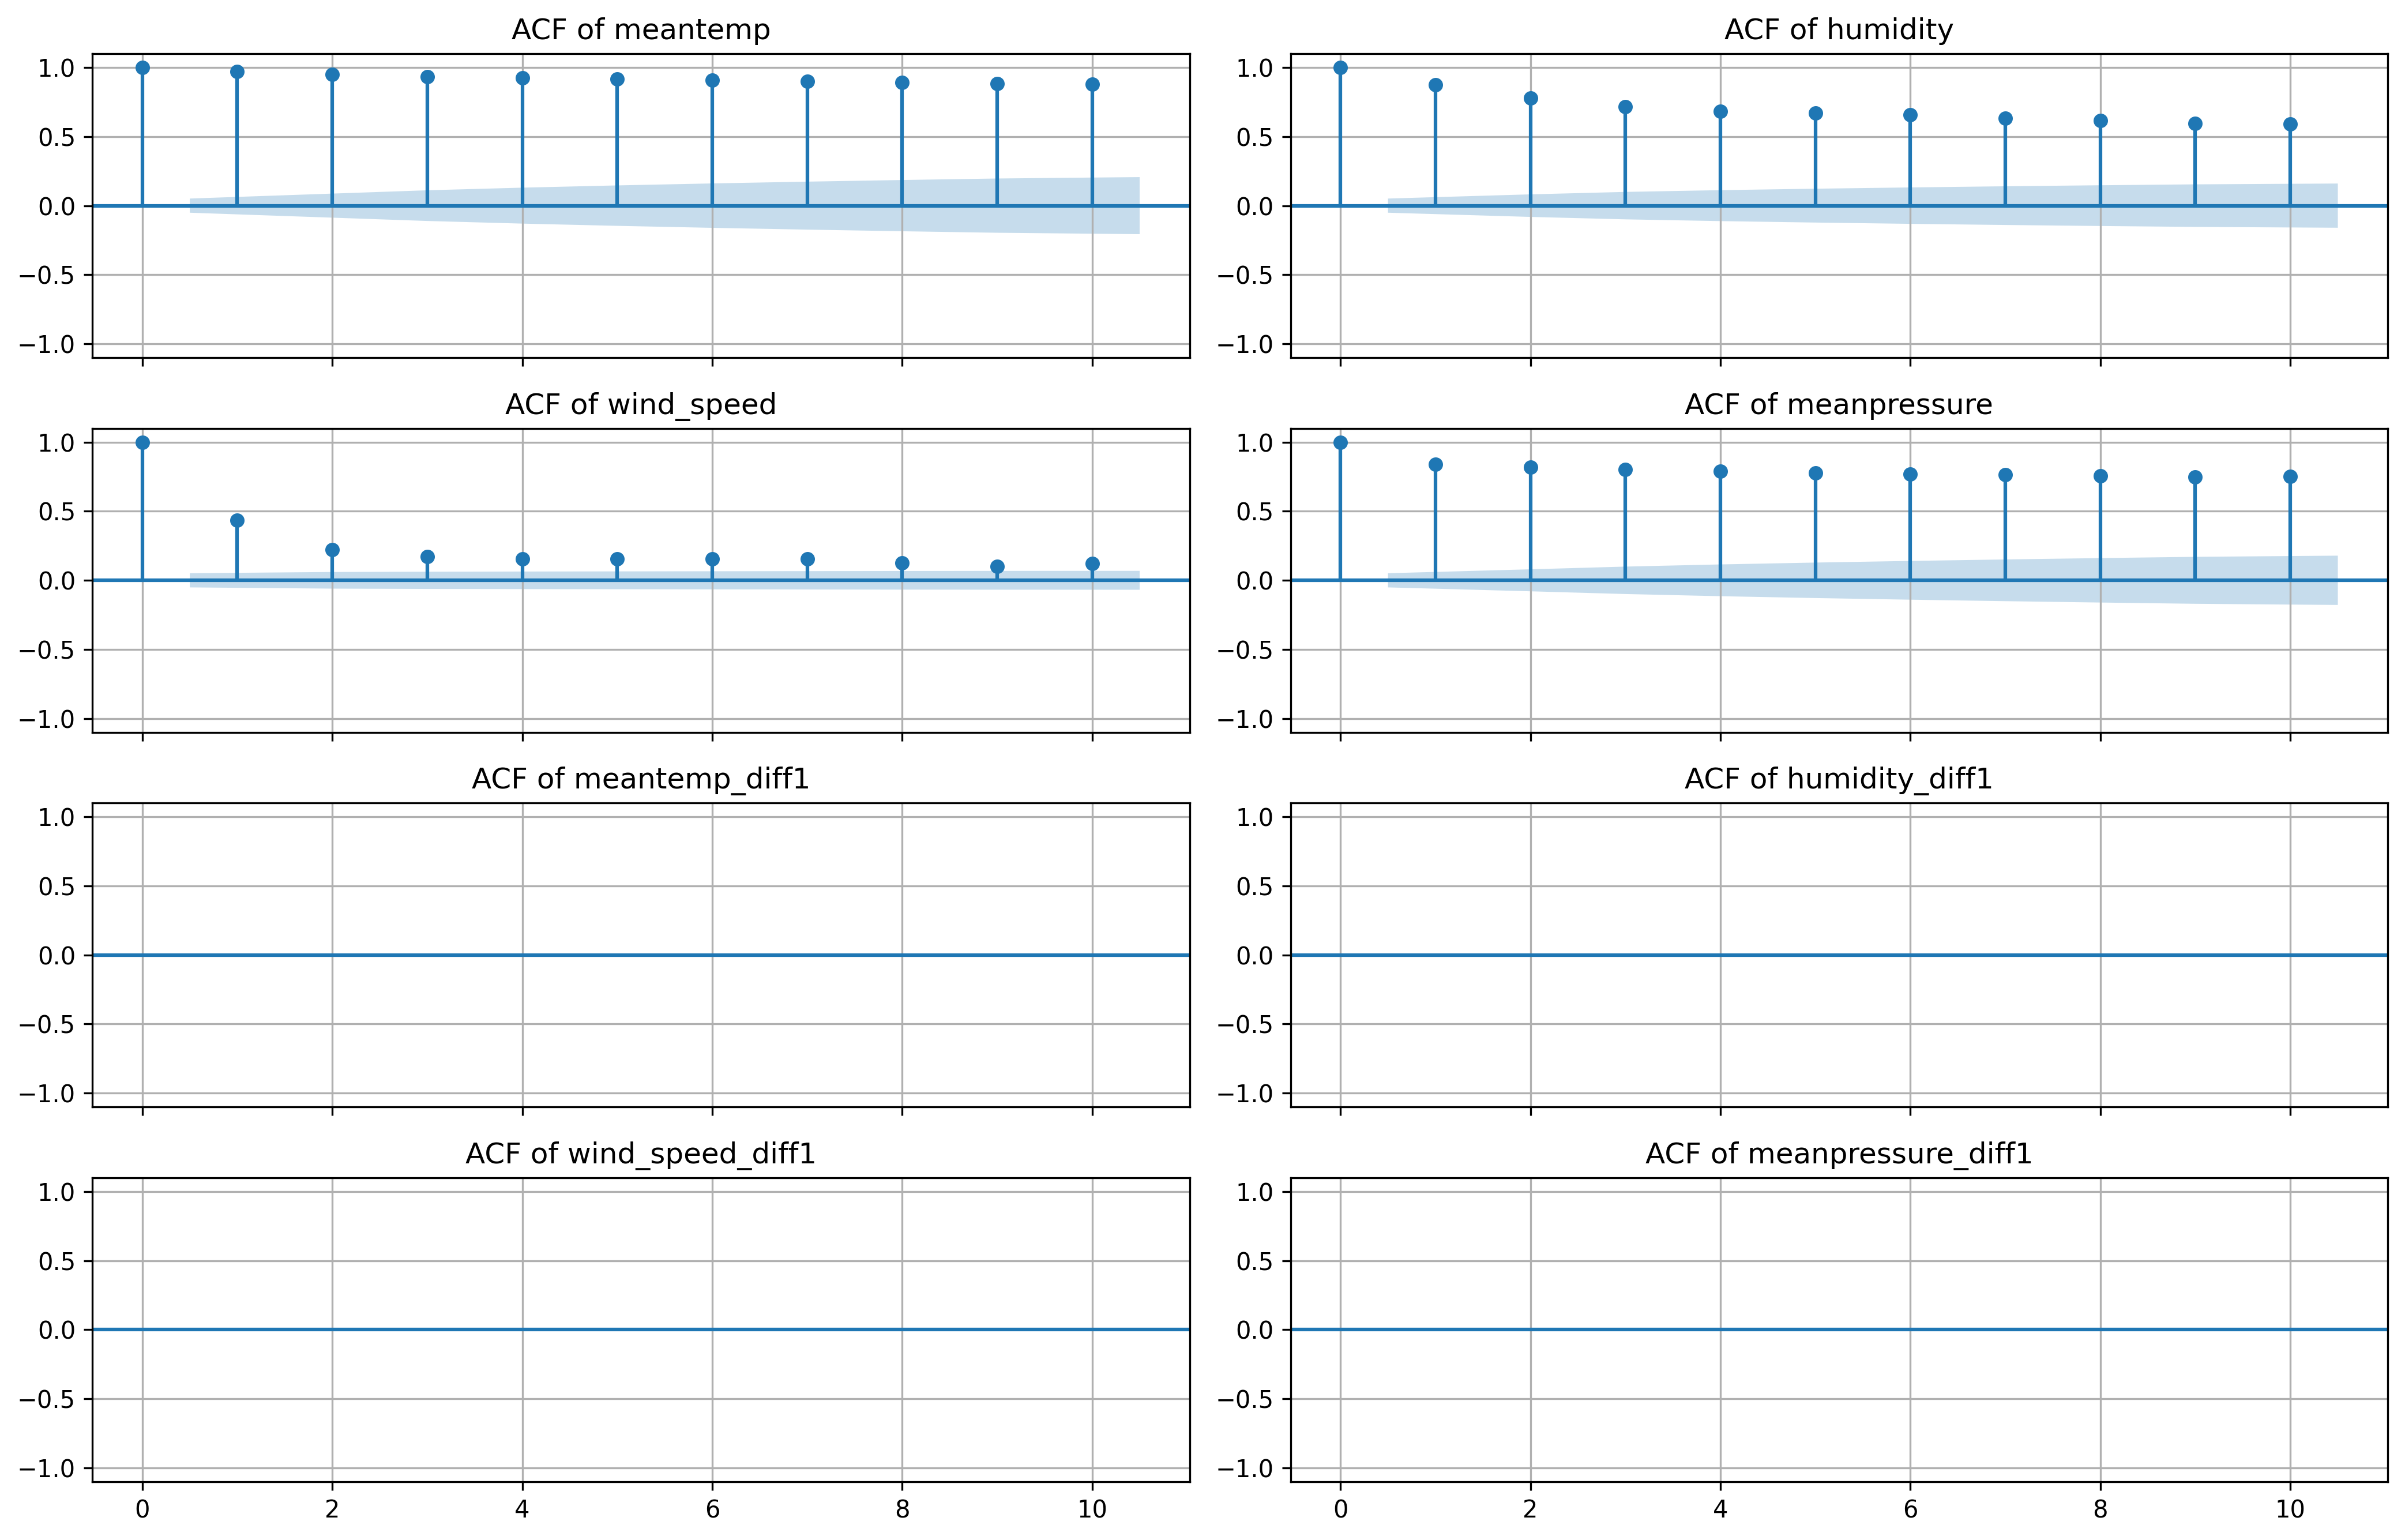

In [95]:
_check_the_eight(plot_type="ACF")

(<Figure size 4200x2700 with 8 Axes>,
 <Axes: title={'center': 'PACF of meanpressure_diff1'}>)

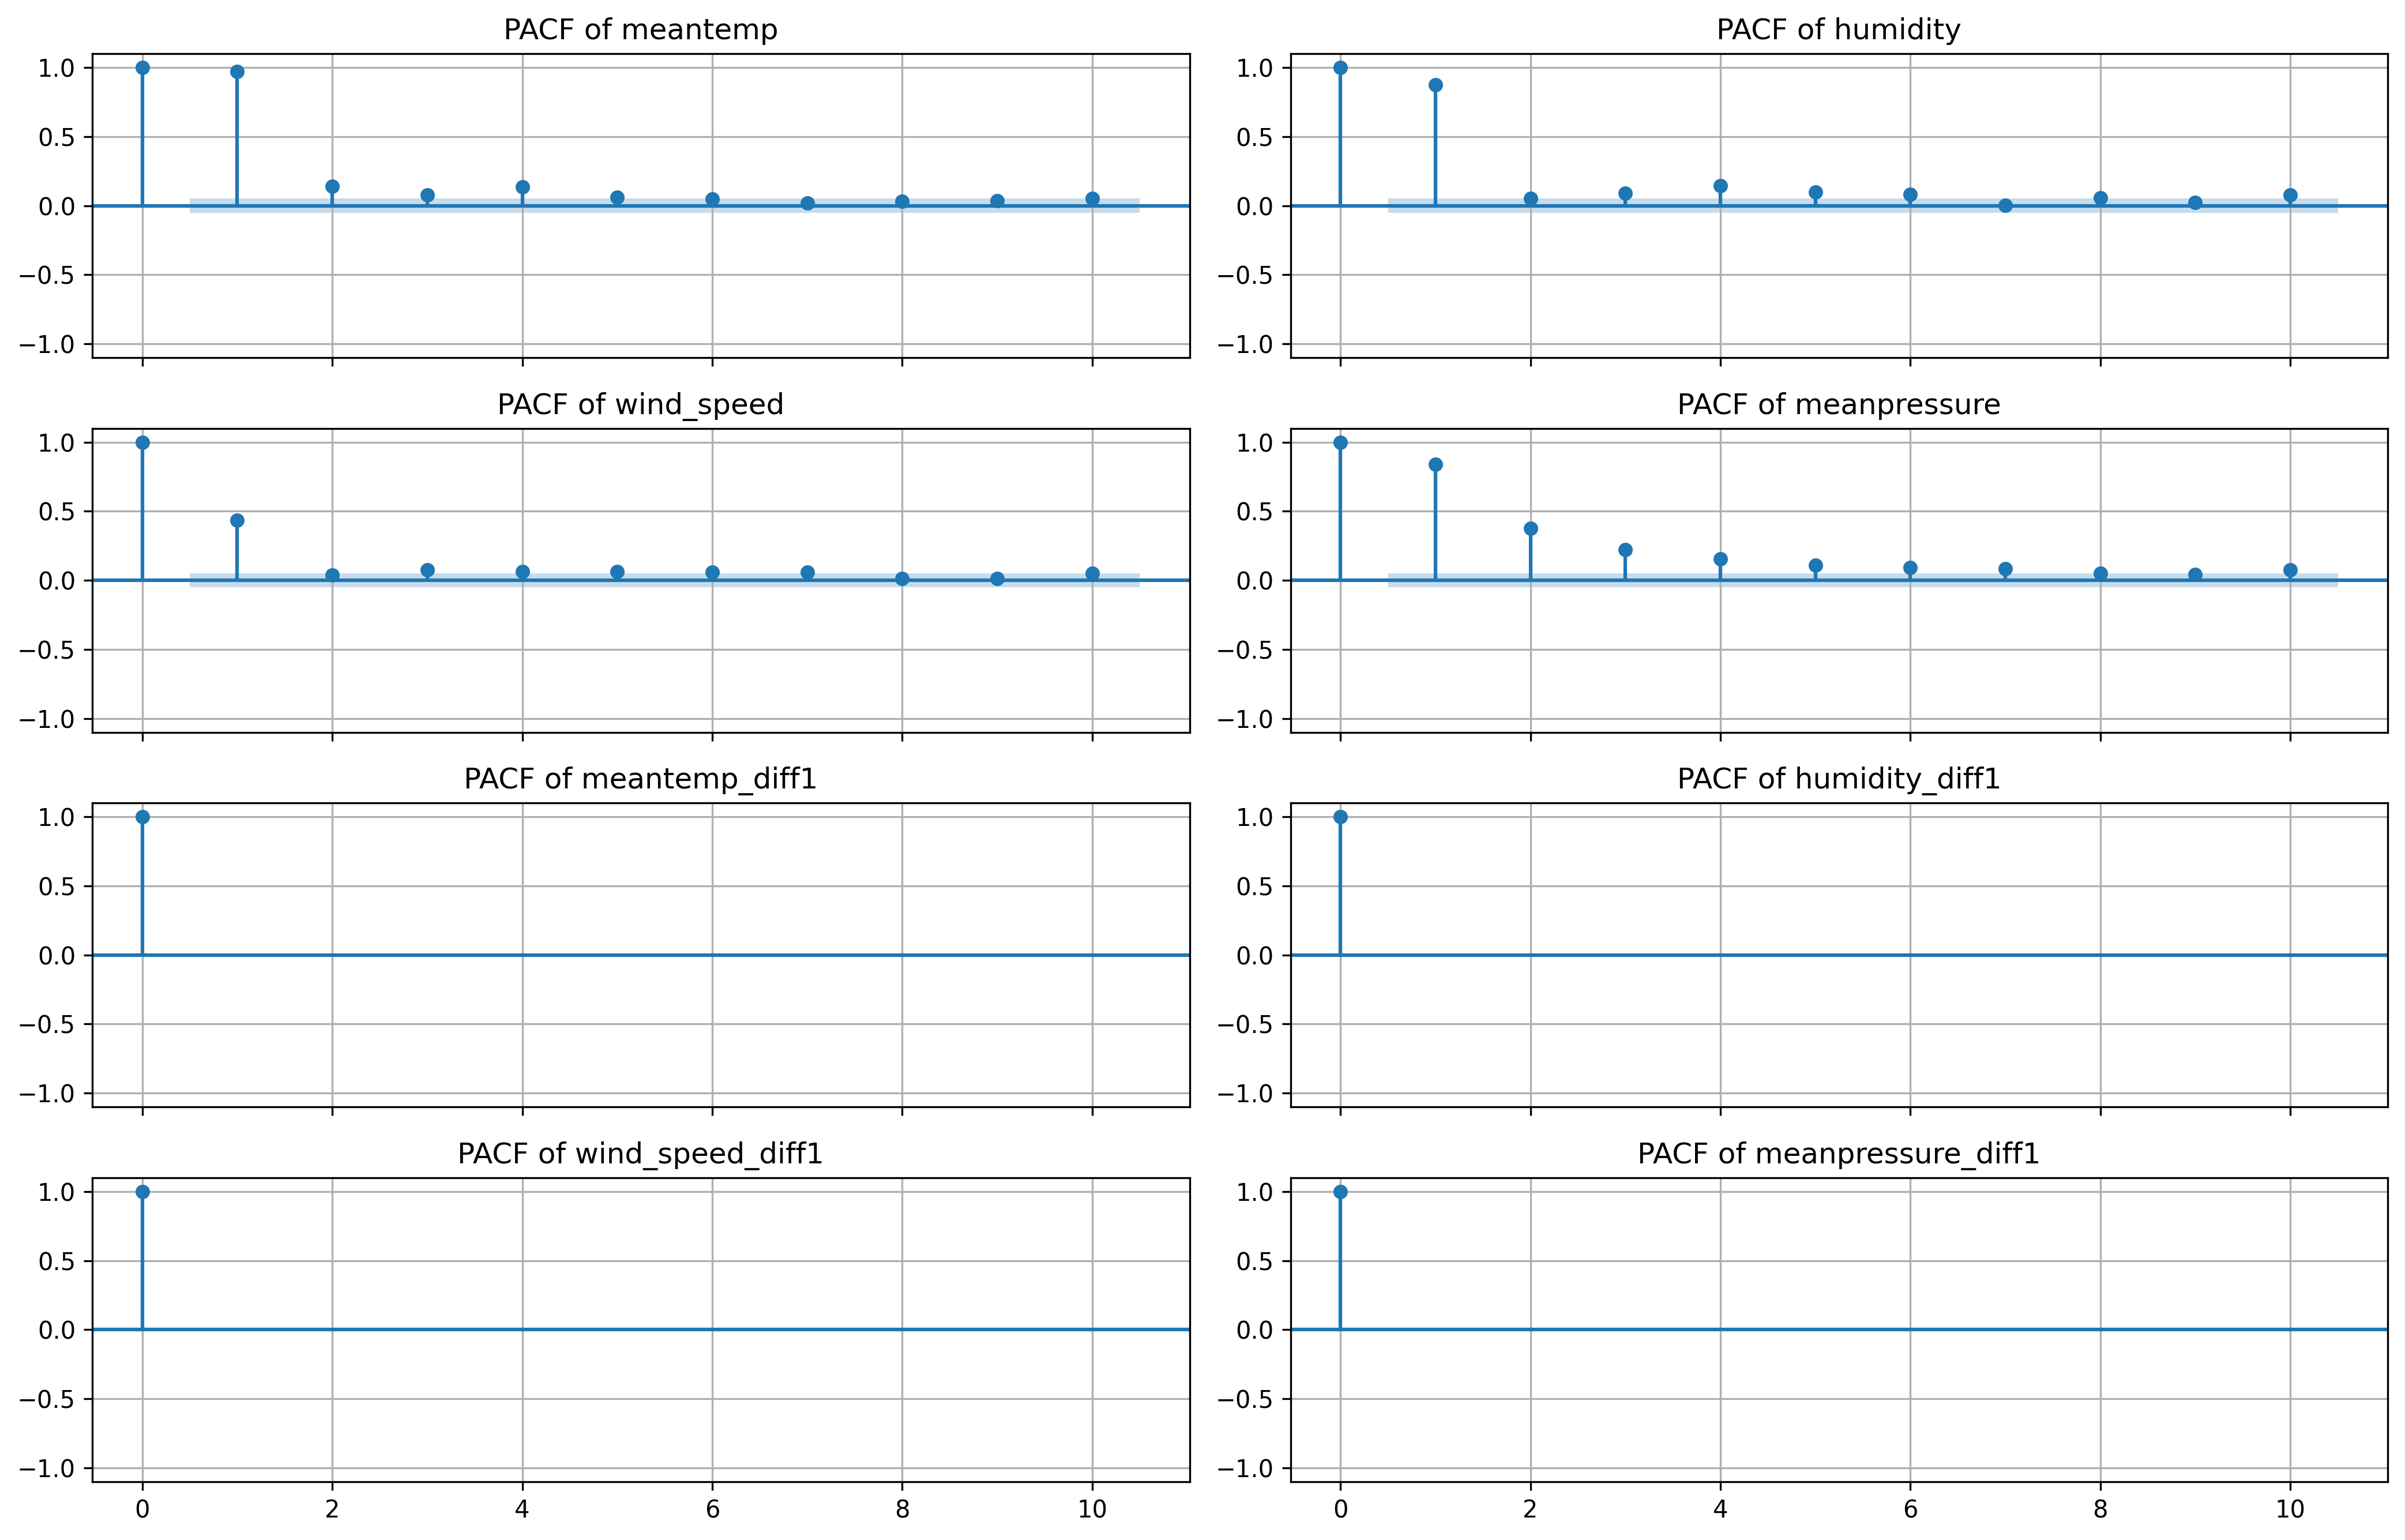

In [99]:
_check_the_eight(plot_type="PACF")

(<Figure size 4200x2700 with 8 Axes>,
 <Axes: xlabel='date', ylabel='meanpressure_diff1'>)

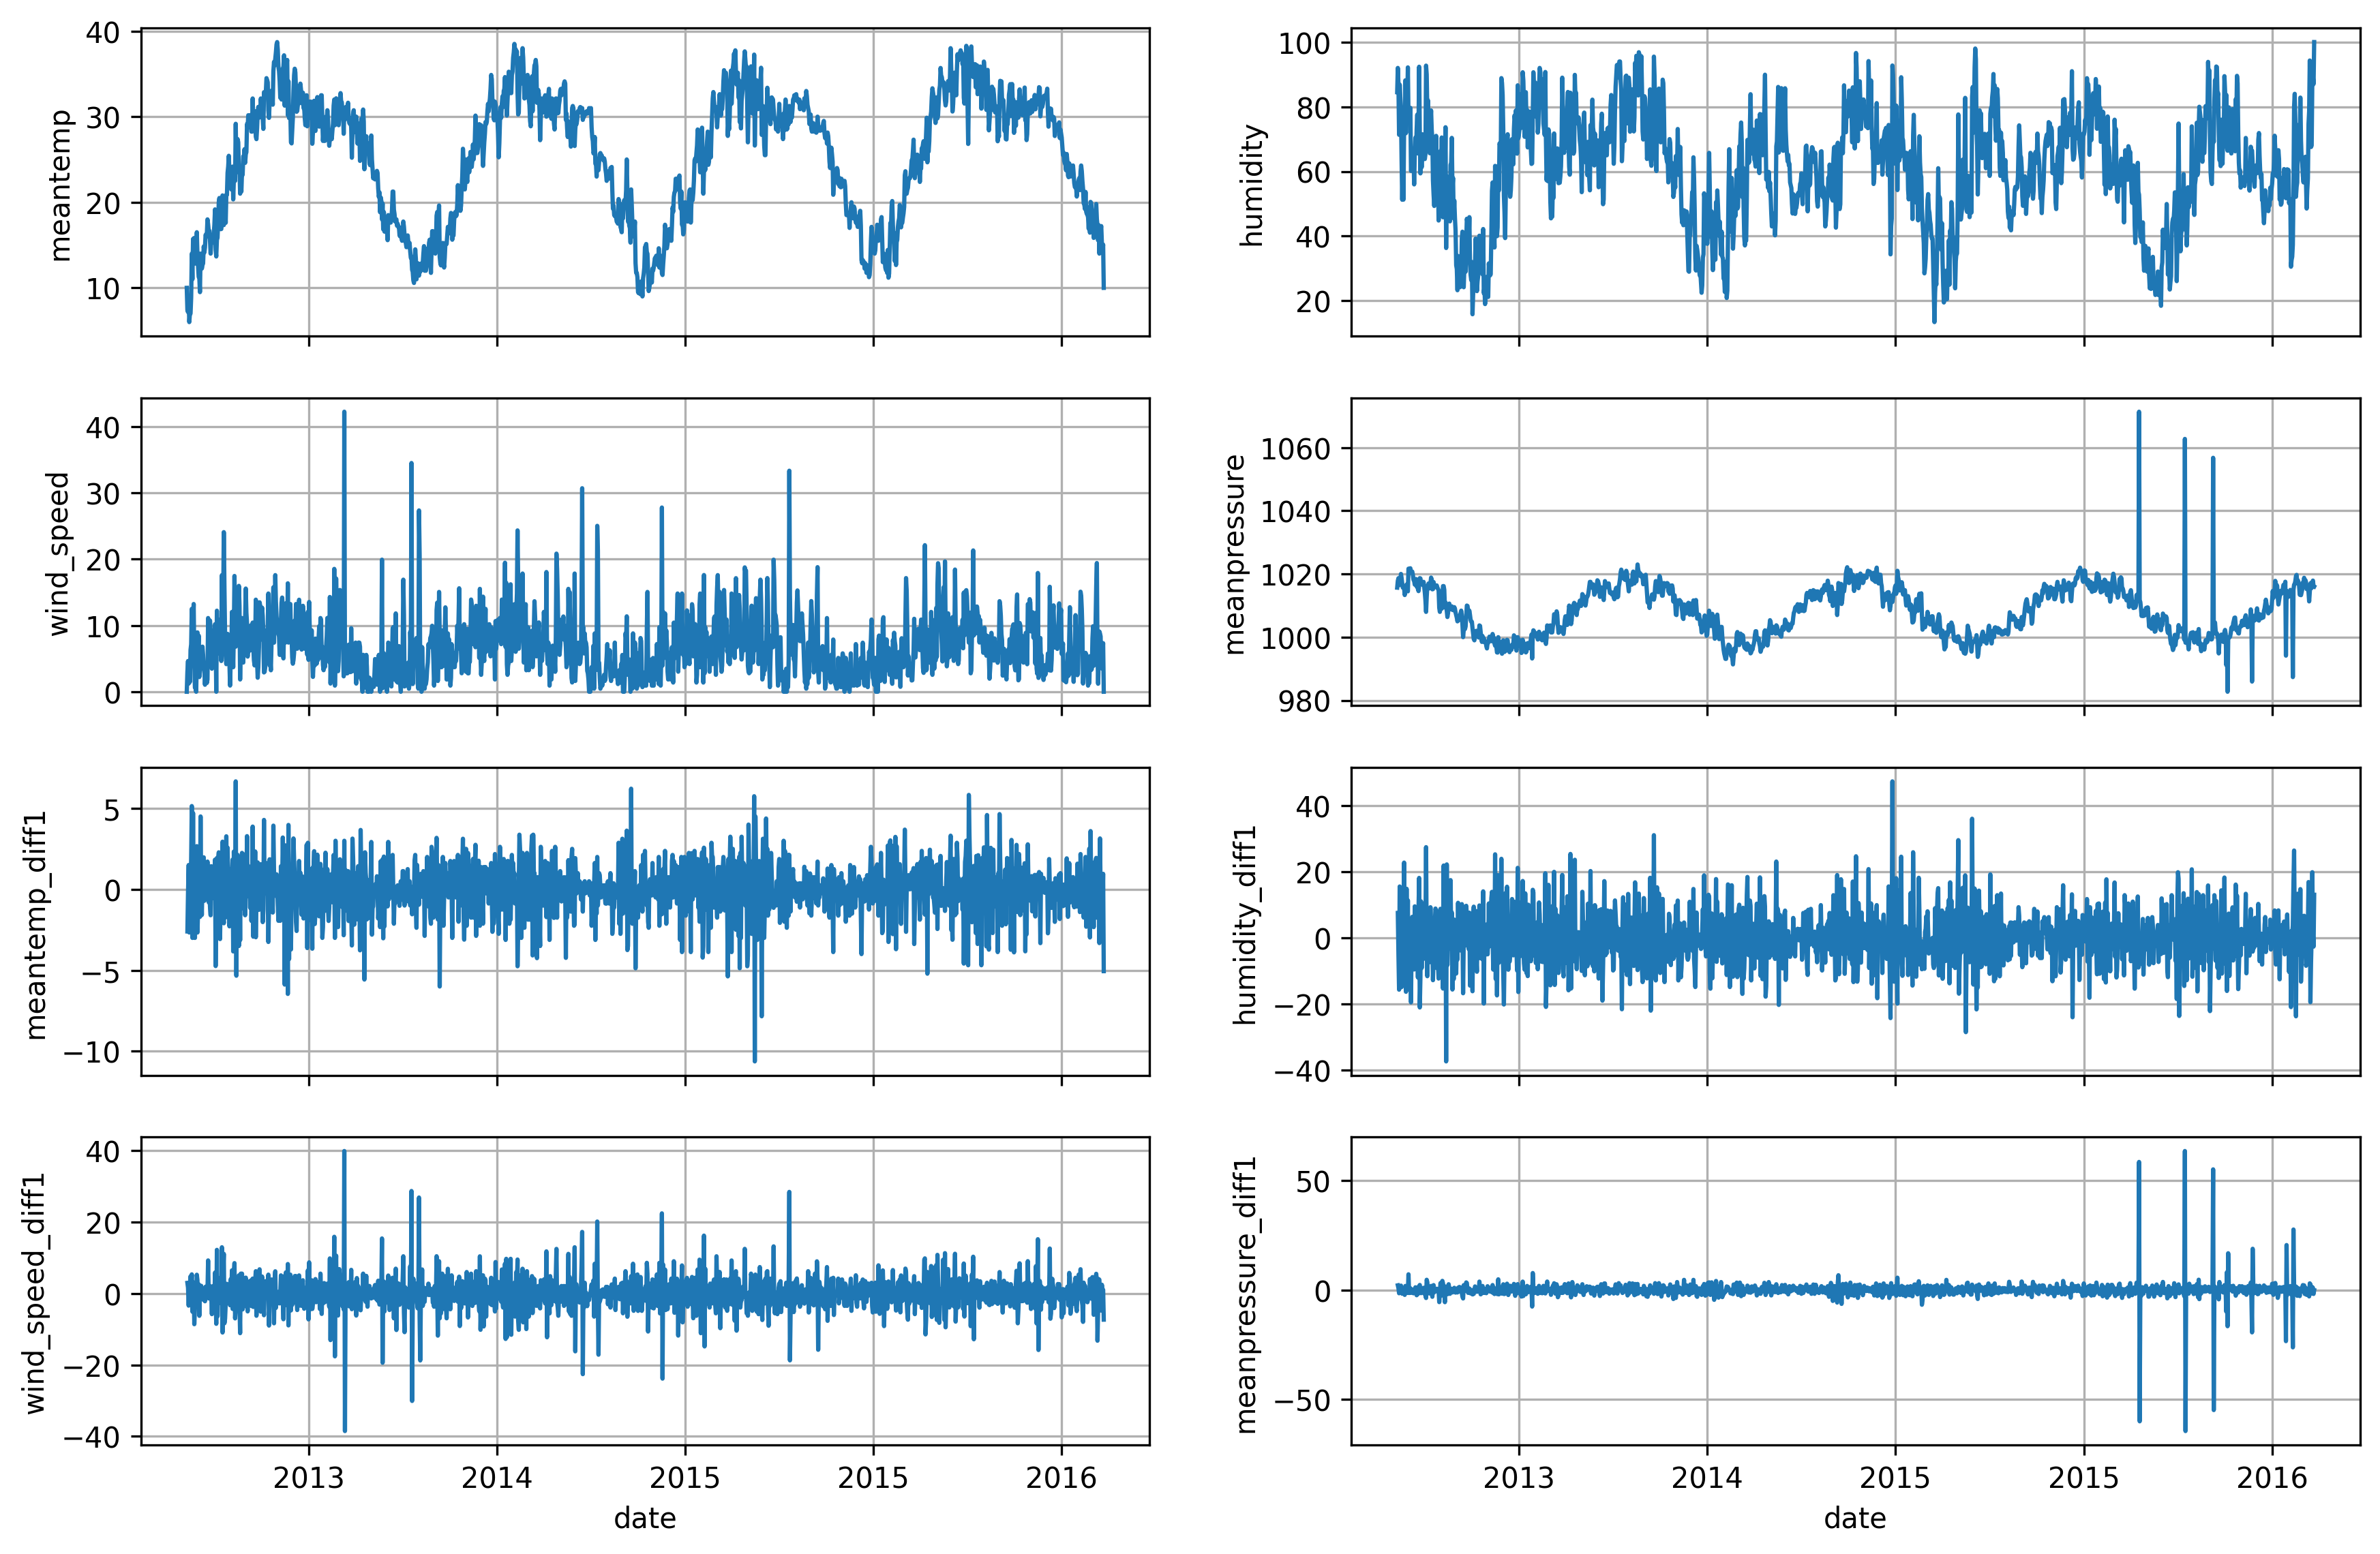

In [100]:
_check_the_eight()

The data after one-order differing looks a little weired in ACF and PACF plots, we will treat it carefully and compare it with the original data in the following work.


## Build the models

In [131]:
import numpy as np
import pandas as pd

def generate_benchmark_models(series, seasonality=12, confidence_level=0.95):
    """
    Generate Mean, Naive, and SNaive models, returning fitted values and confidence intervals.

    Args:
        series (pd.Series): The input time series data.
        seasonality (int): The seasonality period (e.g., 12 for monthly data with yearly seasonality).
        confidence_level (float): The confidence level for intervals (default is 95%).

    Returns:
        pd.DataFrame: Fitted values and confidence intervals for Mean, Naive, and SNaive models.
    """
    n = len(series)
    results = pd.DataFrame(index=series.index)
    
    # Add the Date and true values 
    results["Date"] = series.index.values
    true_values  = series.values
    results["True values"] = true_values
    
    # Mean Model
    mean_forecast = series.mean()
    residuals_mean = true_values - mean_forecast
    std_mean = residuals_mean.std()  # Standard deviation of residuals
    z_value = 1.96  # For 95% CI
    results["Mean_Residuals"] = residuals_mean
    results["Mean_Fitted"] = mean_forecast
    results["Mean_Lower"] = mean_forecast - z_value * std_mean / np.sqrt(n)
    results["Mean_Upper"] = mean_forecast + z_value * std_mean / np.sqrt(n)
    
    # Naive Model
    naive_forecast = series.shift(1)
    residuals_naive = true_values - naive_forecast
    results["Naive_Residuals"] = residuals_naive
    results["Naive_Fitted"] = naive_forecast
    results["Naive_Lower"] = np.nan  # Confidence intervals typically not used
    results["Naive_Upper"] = np.nan

    # SNaive Model
    snaive_forecast = series.shift(seasonality)
    residuals_snaive = true_values - snaive_forecast
    std_snaive = residuals_snaive.std()  # Standard deviation of seasonal residuals
    results["SNaive_Residuals"] = residuals_snaive
    results["SNaive_Fitted"] = snaive_forecast
    results["SNaive_Lower"] = snaive_forecast - z_value * std_snaive / np.sqrt(n)
    results["SNaive_Upper"] = snaive_forecast + z_value * std_snaive / np.sqrt(n)
    
    # MSE Calculation
    mse_values = {
        "Mean": np.round((residuals_mean ** 2).mean(), 4),
        "Naive": np.round((residuals_naive ** 2).mean(), 4),
        "SNaive": np.round((residuals_snaive ** 2).mean(), 4),
    }
    
    return results, mse_values

In [132]:
benchmarks = generate_benchmark_models(train_data.meantemp)[0]
# benchmarks['Date'] = train_data['date']
benchmarks.head()

,Date,True values,Mean_Residuals,Mean_Fitted,Mean_Lower,Mean_Upper,Naive_Residuals,Naive_Fitted,Naive_Lower,Naive_Upper,SNaive_Residuals,SNaive_Fitted,SNaive_Lower,SNaive_Upper
0,0,10.000000,-15.495521,25.495521,25.118982,25.872059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.400000,-18.095521,25.495521,25.118982,25.872059,-2.600000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7.166667,-18.328854,25.495521,25.118982,25.872059,-0.233333,7.400000,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.666667,-16.828854,25.495521,25.118982,25.872059,1.500000,7.166667,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6.000000,-19.495521,25.495521,25.118982,25.872059,-2.666667,8.666667,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# plot the benchmarks
def plot_benchmark_models_with_mse(
    df, mse_values, date_col="Date", actual_col="True values",
    model_cols=["Mean_Fitted", "Naive_Fitted", "SNaive_Fitted"], 
    ci_cols={
        "Mean": ("Mean_Lower", "Mean_Upper"),
        "SNaive": ("SNaive_Lower", "SNaive_Upper")
    }
):
    """
    Plot actual values, fitted values from multiple models, and confidence intervals (if provided).
    Display the MSE values in the upper-left corner of each plot.

    Args:
        df (pd.DataFrame): Dataframe containing the actual values, fitted values, and confidence intervals.
        mse_values (dict): Mean Squared Error values for each model.
        date_col (str): Column name for dates or time indices.
        actual_col (str): Column name for actual observed values.
        model_cols (list): List of column names for fitted values of the benchmark models.
        ci_cols (dict): Dictionary with keys as model names and values as tuples of (lower CI column, upper CI column).
    """
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), dpi =300, sharex=True)

    for ax, model_col in zip(axes, model_cols):
        model_name = model_col.split("_")[0]
        
        # Plot actual values
        ax.plot(df[date_col], df[actual_col], label="Actual", color="black", linewidth=2)
        
        # Plot fitted values
        ax.plot(df[date_col], df[model_col], label=f"{model_name} (Fitted)", linestyle="--")
        
        # Plot confidence intervals if available
        if model_name in ci_cols:
            lower_col, upper_col = ci_cols[model_name]
            if lower_col in df.columns and upper_col in df.columns:
                ax.fill_between(
                    df[date_col], df[lower_col], df[upper_col], alpha=0.2, label=f"{model_name} CI"
                )
        
        # Add MSE value to the plot
        ax.text(
            0.02, 0.95, f"MSE: {mse_values[model_name]}",
            transform=ax.transAxes, fontsize=12, verticalalignment="top", bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
        )
        
        # Customize each subplot
        ax.set_title(f"{model_name} Model: Fitted Values and Confidence Intervals", fontsize=14)
        ax.set_xlabel("Date", fontsize=12)
        ax.set_ylabel("Value", fontsize=12)
        ax.legend(loc = "lower right")
        ax.grid()

    plt.tight_layout()
    plt.show()

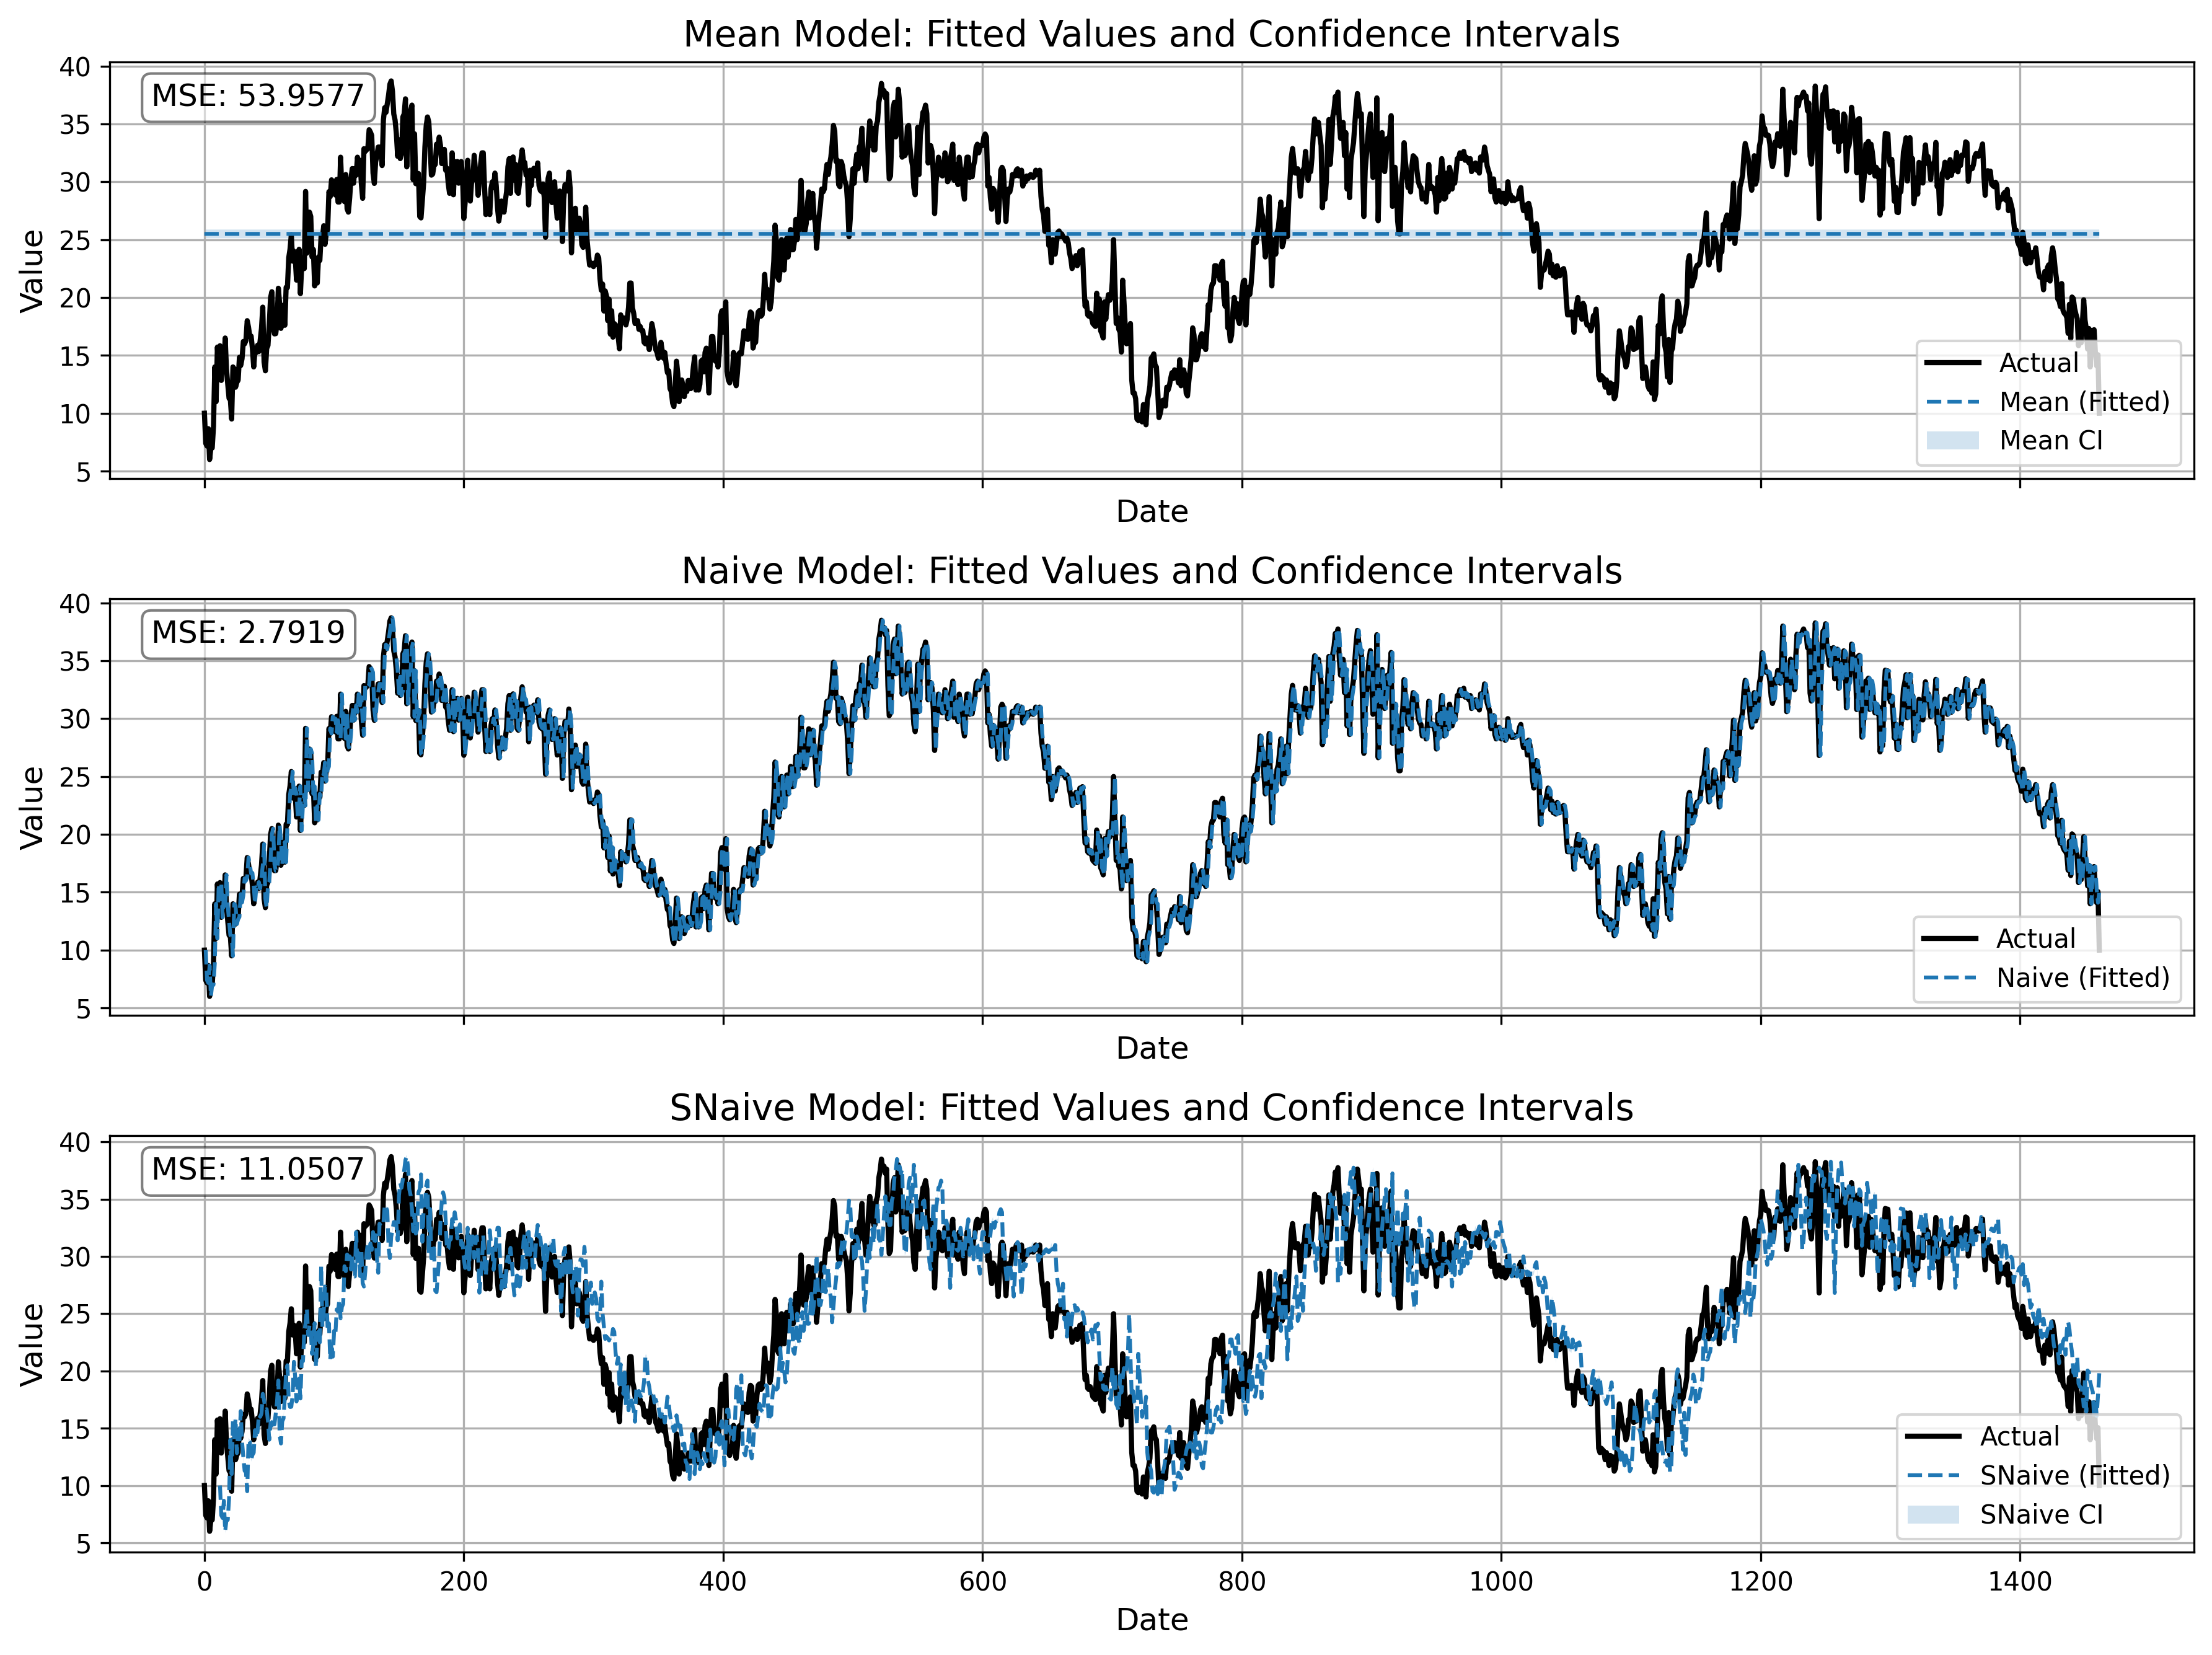

In [137]:
# Generate benchmark models and MSE values
benchmarks, mse_values = generate_benchmark_models(train_data.meantemp, seasonality=12)

# Plot benchmark models with MSE
plot_benchmark_models_with_mse(benchmarks, mse_values)